# Lexicon Analysis

In [3]:
from lexicraft import Analysis
from pyspark.sql import SparkSession
uri = "neo4j+s://231511d9.databases.neo4j.io"
auth = ("neo4j", "m6fWF6qQUe6yGcZ81yAX0XG425OncyOB28A30vI9VvM") ## using liangzlau personal account
spark = SparkSession.builder.appName("DE-prj").getOrCreate()
analysis_instance = Analysis(spark,uri,auth)

In [2]:
analysis_instance.word_length_analysis()
analysis_instance.lemma_length_analysis()
analysis_instance.lexicon_analysis()
analysis_instance.morphological_analysis() 
analysis_instance.POSDistribution()
analysis_instance.sentiment_dist()
analysis_instance.word_freq_with_stopwords()
analysis_instance.word_freq_without_stopwords()

Established Connection
Successfully retrieved all words no. of words = 842!
Message sent to word_length_analysis partition 0 at offset 4
Established Connection
Successfully run 
            MATCH (n:WORD)-[:LEMMATIZED]->(lematizedNode)
            RETURN DISTINCT lematizedNode.word AS lemmatized
        !
Message sent to lemma_length_analysis partition 0 at offset 4
Established Connection
Successfully run 
        MATCH (n:WORD)
        WITH COUNT(n) AS totalWords
        MATCH (n:PERIBAHASA)
        RETURN totalWords, COUNT(n) AS totalPeri;
        !
Message sent to lexicon_analysis partition 0 at offset 4
Established Connection
Successfully retrieved all words no. of words = 842!


[Stage 1:>                                                          (0 + 6) / 6]/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  sel

Message sent to morphological_analysis partition 0 at offset 2
Established Connection
Successfully run 
            MATCH (n:WORD)
            RETURN n.POS AS pos, COUNT(n) AS total_count
            ORDER BY total_count DESC
            !
Message sent to POSDistribution partition 0 at offset 2
Established Connection
Successfully run 
            MATCH (n:WORD)
            RETURN n.Label AS label, COUNT(n) AS total_count
            ORDER BY total_count DESC
            !
Message sent to sentiment_dist_analysis partition 0 at offset 2
Established Connection
Successfully run 
            MATCH (n:WORD)
            RETURN n.word AS word, n.word_count AS count
            ORDER BY n.word_count DESC
            LIMIT 15
            !
Message sent to word_freq_with_stopwords partition 0 at offset 2
Established Connection
Successfully run 
            MATCH (n:WORD)
            RETURN n.word AS word, n.word_count AS count
            ORDER BY n.word_count DESC
            LIMIT 1500
        

## Instrincis Analysis

In [1]:
from lexicraft import Analysis
from pyspark.sql import SparkSession
uri = "neo4j+s://231511d9.databases.neo4j.io"
auth = ("neo4j", "m6fWF6qQUe6yGcZ81yAX0XG425OncyOB28A30vI9VvM") ## using liangzlau personal account
spark = SparkSession.builder.appName("DE-prj").getOrCreate()
analysis_instance = Analysis(spark,uri,auth)

/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3927
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
24/12/21 22:31:45 WARN Utils: Your hostname, Liang. resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
24/12/21 22:31:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/12/21 22:31:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Accuracy

In [2]:
Analysis.intrinsic_accuracy("cari",uri,auth)

Established Connection
Successfully run 
            MATCH (n:WORD {word: 'cari'})
            RETURN n.word AS word, n.definitions AS definitions
            LIMIT 1
            !
Token Overlap Accuracy: 0.38


### Consistency

In [2]:
list_of_words = ["perempuan", "polis", "guru", "rumah", "buku"]
Analysis.intrinsic_consistency(list_of_words,uri,auth)

Established Connection
Successfully run 
                MATCH (n:WORD {word: 'perempuan'})
                RETURN n.word AS word, n.POS AS pos
                LIMIT 1
                !
Successfully run 
                MATCH (n:WORD {word: 'polis'})
                RETURN n.word AS word, n.POS AS pos
                LIMIT 1
                !
Successfully run 
                MATCH (n:WORD {word: 'guru'})
                RETURN n.word AS word, n.POS AS pos
                LIMIT 1
                !
Successfully run 
                MATCH (n:WORD {word: 'rumah'})
                RETURN n.word AS word, n.POS AS pos
                LIMIT 1
                !
Successfully run 
                MATCH (n:WORD {word: 'buku'})
                RETURN n.word AS word, n.POS AS pos
                LIMIT 1
                !
[[], [{'word': 'polis', 'pos': 'Proper noun'}], [], [], []]


### Coverage

In [3]:
analysis_instance.intrinsic_coverage()

Established Connection
Successfully run 
            MATCH (n:WORD)
            RETURN n.word AS word, n.word_count AS count, n.definitions AS definitions
            ORDER BY n.word_count DESC
            LIMIT 1000
            !
Total Words: 1000
Covered Words: 997
Coverage Percentage: 99.70%

Example of Not Covered Words:
menganak, sewajar, parwah
Message sent to intrinsic_coverage partition 0 at offset 0


## Extrinsic Evaluation

### Word Sentiment

Established Connection
Successfully run 
        MATCH (n)
        WHERE n.word IS NOT NULL AND n.Label IS NOT NULL
            AND n.Label IN ['positive', 'neutral', 'negative']
        RETURN n.word AS word, 
           CASE 
               WHEN n.Label = 'positive' THEN 1
               WHEN n.Label = 'neutral' THEN 0
               WHEN n.Label = 'negative' THEN -1
           END AS label_int;
        !
Model trained successfully on the lexicon dataset.
Extrinsic Evaluation Accuracy: 0.20

Extrinsic Evaluation Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        16
     Neutral       0.20      1.00      0.33         7
    Positive       0.00      0.00      0.00        12

    accuracy                           0.20        35
   macro avg       0.07      0.33      0.11        35
weighted avg       0.04      0.20      0.07        35



/home/student/de-prj/de-venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/student/de-prj/de-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/student/de-prj/de-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: P

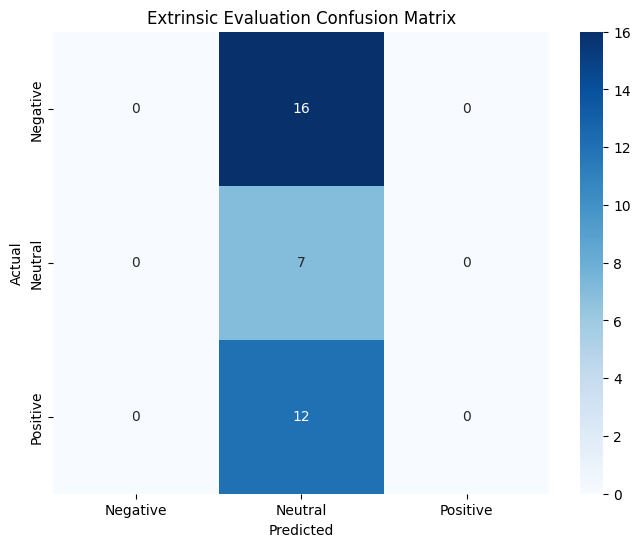

In [2]:
Analysis.extrinsic_word_sentiment('word_sample.csv',uri,auth)